In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

%matplotlib inline

In [18]:
files1 = r'C:\Users\apurv\Desktop\Spyder\MERRA-2 DATA\Monthly Black Carbon Column Mass Density\*.nc4'

dsB = xr.open_mfdataset(files1)

files2 = r'C:\Users\apurv\Desktop\Spyder\MERRA-2 DATA\Monthly Dust column mass density\DATA  GLOBAL\*.nc4'

dsD = xr.open_mfdataset(files2)

In [64]:
dsB.time.size

516

In [20]:
dsD

<xarray.Dataset>
Dimensions:      (time: 516, lat: 361, lon: 576)
Coordinates:
  * time         (time) datetime64[ns] 1980-01-01T00:30:00 ... 2022-12-01T00:...
  * lat          (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon          (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Data variables:
    DUCMASS      (time, lat, lon) float32 dask.array<chunksize=(121, 361, 576), meta=np.ndarray>
    Var_DUCMASS  (time, lat, lon) float32 dask.array<chunksize=(121, 361, 576), meta=np.ndarray>
Attributes: (12/32)
    History:                           Original file generated: Thu May  7 21...
    Filename:                          MERRA2_100.tavgM_2d_aer_Nx.198001.nc4
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/FH9A0MLJPC7N
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000
    DODS_EXTRA.Unlimited_Dimension:    time
    history:                           2023-01-30 07:40:58 GMT Hyrax-1.16.3 h...

In [23]:
bccmass = dsB.BCCMASS.sel(lon=slice(10, 100), lat=slice(20,40))
ducmass = dsD.DUCMASS.sel(lon=slice(10, 100), lat=slice(20, 40))

In [24]:
# Using filter to drop unrequired values 

data = np.load('filter_merra_Himalay.npz')
fltr  = data['filter']

ducmass2 = ducmass*fltr
bccmass2 = bccmass*fltr

In [27]:
# Creating an empty DataFrame with dates as index (For March, April and May in each year)

month = np.arange(3,6)
years = np.arange(1980,2023)
date = []

for i in range (0,years.size):
    for j in range (0,month.size):
        date.append(str(years[i]) + '-0' + str(month[j]) + '-01T00:30:00')
        
df = pd.DataFrame(0, columns = ['Ducmass', 'Bccmass'], index = date)
df

,Ducmass,Bccmass
1980-03-01T00:30:00,0,0
1980-04-01T00:30:00,0,0
1980-05-01T00:30:00,0,0
1981-03-01T00:30:00,0,0
1981-04-01T00:30:00,0,0
...,...,...
2021-04-01T00:30:00,0,0
2021-05-01T00:30:00,0,0
2022-03-01T00:30:00,0,0
2022-04-01T00:30:00,0,0


In [28]:
# Adding the values to the empty dataframe

date2 = np.array(date)
for i in range(0,date2.size):
    df.iloc[i,0] = float(ducmass2.sel(time=date2[i]).mean(dim=('lat','lon')))
    df.iloc[i,1] = float(bccmass2.sel(time=date2[i]).mean(dim=('lat','lon')))

df

,Ducmass,Bccmass
1980-03-01T00:30:00,0.000185,9.487352e-07
1980-04-01T00:30:00,0.000222,9.010351e-07
1980-05-01T00:30:00,0.000354,8.371252e-07
1981-03-01T00:30:00,0.000138,9.221438e-07
1981-04-01T00:30:00,0.000226,8.255616e-07
...,...,...
2021-04-01T00:30:00,0.000338,2.398867e-06
2021-05-01T00:30:00,0.000362,2.160828e-06
2022-03-01T00:30:00,0.000249,2.309883e-06
2022-04-01T00:30:00,0.000416,2.350158e-06


In [38]:
# creating a dataframe to store monthly mean values

df_mean = pd.DataFrame(0, columns=['D March', 'D April', 'D May', 'B March', 'B April', 'B May', 'D Mean', 'B Mean'], index=years)

for i in range(0,years.size):
    df_mean.iloc[i,0] = df.loc[str(years[i]) + '-03-01T00:30:00', 'Ducmass']
    df_mean.iloc[i,1] = df.loc[str(years[i]) + '-04-01T00:30:00', 'Ducmass']
    df_mean.iloc[i,2] = df.loc[str(years[i]) + '-05-01T00:30:00', 'Ducmass']
    df_mean.iloc[i,3] = df.loc[str(years[i]) + '-03-01T00:30:00', 'Bccmass']
    df_mean.iloc[i,4] = df.loc[str(years[i]) + '-04-01T00:30:00', 'Bccmass']
    df_mean.iloc[i,5] = df.loc[str(years[i]) + '-05-01T00:30:00', 'Bccmass']
    df_mean.iloc[i,6] = df_mean.iloc[i,[0,1,2]].mean()
    df_mean.iloc[i,7] = df_mean.iloc[i,[3,4,5]].mean()
    
df_mean

,D March,D April,D May,B March,B April,B May,D Mean,B Mean
1980,0.000185,0.000222,0.000354,9.487352e-07,9.010351e-07,8.371252e-07,0.000254,8.956318e-07
1981,0.000138,0.000226,0.000344,9.221438e-07,8.255616e-07,8.522929e-07,0.000236,8.666661e-07
1982,0.000133,0.000213,0.000254,9.218512e-07,1.024029e-06,8.572287e-07,0.000200,9.343698e-07
1983,0.000153,0.000208,0.000319,8.720375e-07,9.213330e-07,9.615219e-07,0.000226,9.182975e-07
1984,0.000169,0.000278,0.000313,8.656171e-07,1.105771e-06,8.084533e-07,0.000253,9.266138e-07
1985,0.000210,0.000253,0.000308,8.456328e-07,9.543422e-07,9.145874e-07,0.000257,9.048541e-07
1986,0.000215,0.000237,0.000315,1.064948e-06,1.019512e-06,9.839445e-07,0.000256,1.022802e-06
1987,0.000216,0.000203,0.000322,1.069694e-06,1.023939e-06,9.873037e-07,0.000247,1.026979e-06
1988,0.000225,0.000268,0.000312,9.400499e-07,1.196027e-06,9.204129e-07,0.000268,1.018830e-06
1989,0.000160,0.000197,0.000297,1.193930e-06,8.691198e-07,8.762224e-07,0.000218,9.797575e-07


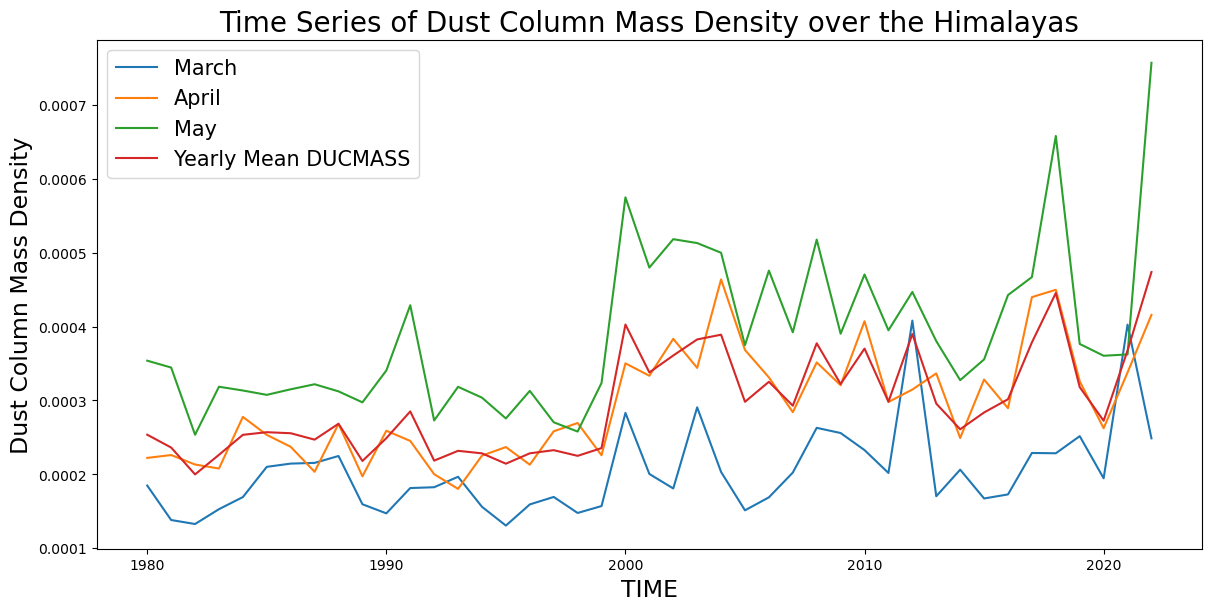

In [55]:
# TIME SERIES OF SNOW DEPTH

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

line1 = ax.plot(df_mean['D March'], label='March')
line2 = ax.plot(df_mean['D April'], label='April')
line3 = ax.plot(df_mean['D May'], label='May')

line4 = ax.plot(df_mean['D Mean'], label='Yearly Mean DUCMASS', linestyle='solid')

#line5 = plt.axhline(y=0, color='black', linestyle='--', label='Climatological Mean')

ax.set_xlabel('TIME').set_size(17)
ax.set_ylabel('Dust Column Mass Density').set_size(17)

ax.set_title('Time Series of Dust Column Mass Density over the Himalayas', fontsize=20)

plt.legend(fontsize=15)

#fig.savefig('Time Series of Dust Anomalies over the Himalayas.png', dpi=200)

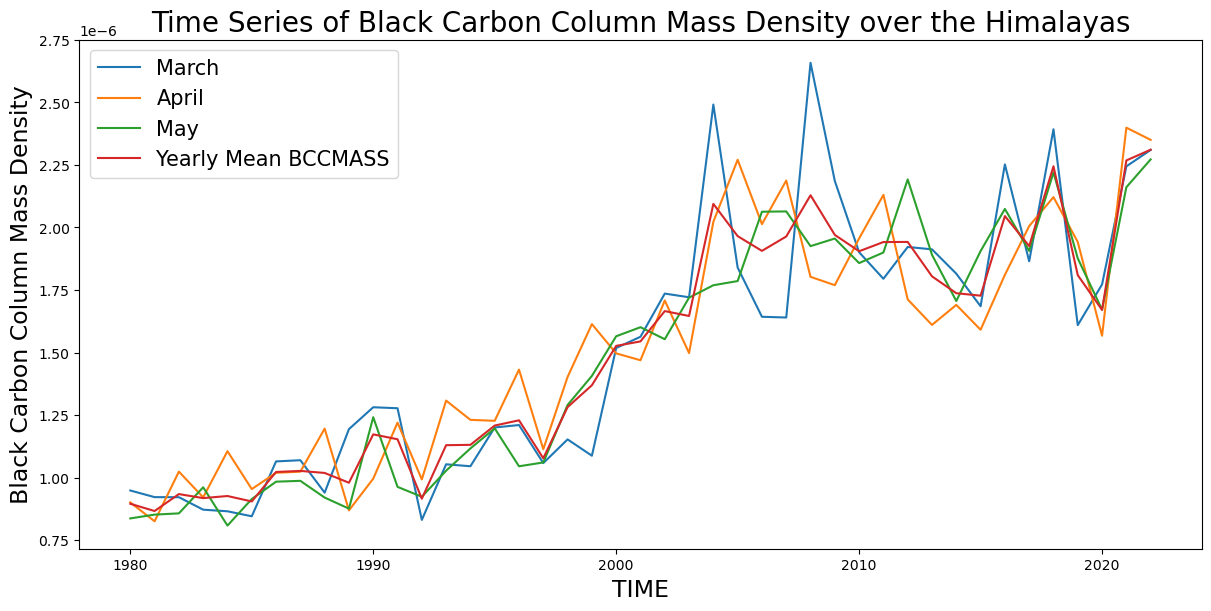

In [41]:
# TIME SERIES OF SNOW DEPTH

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

line1 = ax.plot(df_mean['B March'], label='March')
line2 = ax.plot(df_mean['B April'], label='April')
line3 = ax.plot(df_mean['B May'], label='May')

line4 = ax.plot(df_mean['B Mean'], label='Yearly Mean BCCMASS', linestyle='solid')

#line5 = plt.axhline(y=0, color='black', linestyle='--', label='Climatological Mean')

ax.set_xlabel('TIME').set_size(17)
ax.set_ylabel('Black Carbon Column Mass Density').set_size(17)

ax.set_title('Time Series of Black Carbon Column Mass Density over the Himalayas', fontsize=20)

plt.legend(fontsize=15)

#fig.savefig('Time Series of Dust Anomalies over the Himalayas.png', dpi=200)

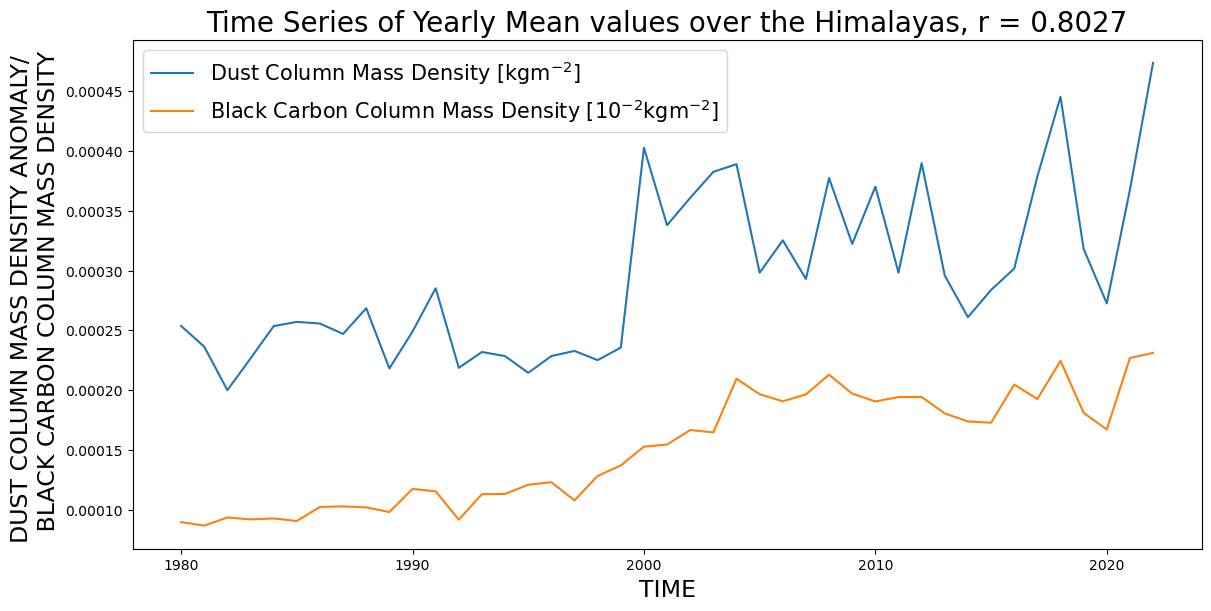

In [63]:
# Plotting the time series of dust and snow depth mean values

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True)

line1 = ax.plot(df_mean['D Mean'], label='Dust Column Mass Density [$\mathregular{kgm^{-2}}$]', linestyle='solid')

line2 = ax.plot(df_mean['B Mean']*100, label='Black Carbon Column Mass Density [$\mathregular{10^{-2}}$$\mathregular{kgm^{-2}}$]', linestyle='solid')

#line3 = plt.axhline(y=0, color='black', linestyle='--', label='Climatological Mean')

ax.set_xlabel('TIME').set_size(17)
ax.set_ylabel('DUST COLUMN MASS DENSITY ANOMALY/ \n BLACK CARBON COLUMN MASS DENSITY').set_size(17)

ax.set_title('Time Series of Yearly Mean values over the Himalayas, r = 0.8027', fontsize=20)

plt.legend(fontsize=15)

#fig.savefig('Time Series of Dust Anomalies over the Himalayas.png', dpi=200)

In [56]:
df_mean['D Mean'].corr(df_mean['B Mean'])

0.802722671895212

In [57]:
# For linear relation

from scipy.stats.stats import pearsonr

pearsonr(df_mean['D Mean'], df_mean['B Mean'])

C:\Users\apurv\AppData\Local\Temp\ipykernel_133956\1418459003.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.8027226718952121, pvalue=9.518001120907595e-11)

In [58]:
# for non-linear relation

from scipy.stats.stats import spearmanr

spearmanr(df_mean['D Mean'], df_mean['B Mean'])

C:\Users\apurv\AppData\Local\Temp\ipykernel_133956\2813826780.py:1: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import spearmanr


SpearmanrResult(correlation=0.7672908486861976, pvalue=1.952669802645194e-09)

In [59]:
# for non-linear relation

from scipy.stats.stats import kendalltau

kendalltau(df_mean['D Mean'], df_mean['B Mean'])

C:\Users\apurv\AppData\Local\Temp\ipykernel_133956\1443778134.py:1: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import kendalltau


KendalltauResult(correlation=0.5393133997785161, pvalue=3.456987808442761e-07)